## Notebook Imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

# Gater Data

[Boston Dataset URL](http://lib.stat.cmu.edu/datasets/boston)

In [10]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]



## Data Point

In [12]:
print('The tpe of datasetis: ',type(data))
print('The type of target dataset is: ', type(target))

The tpe of datasetis:  <class 'numpy.ndarray'>
The type of target dataset is:  <class 'numpy.ndarray'>


In [13]:
print('the size of the dataset is: ', data.shape)

the size of the dataset is:  (506, 13)


In [14]:
target.shape

(506,)

In [15]:
# Actual prices in thousands (000s)
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Exploration with panda DataFrames

In [29]:
# Create panda dataframe
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
data = pd.DataFrame(data=data, columns=feature_names)

# Add column with the price (target)
data['PRICE'] = target


In [17]:
data.head() # The top rows look like this

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [18]:
data.tail() # The bottom rows of the data

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [19]:
data.count() # number of rows for each column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [21]:
# number of missing value in each of the column
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Visualising Data - Histograms, Distributions and Bar Charts

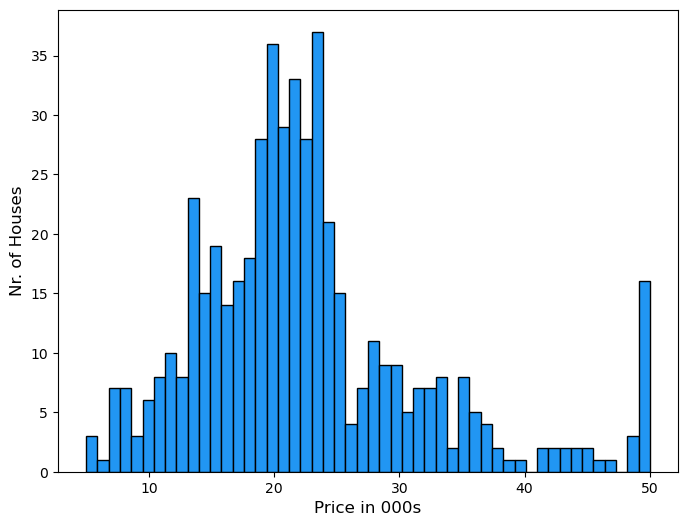

In [22]:
plt.figure(figsize=(8, 6))
plt.xlabel("Price in 000s", fontsize=12)
plt.ylabel("Nr. of Houses", fontsize = 12)
plt.hist(data['PRICE'], bins=50, color= '#2196f3', edgecolor= 'black')
plt.show()

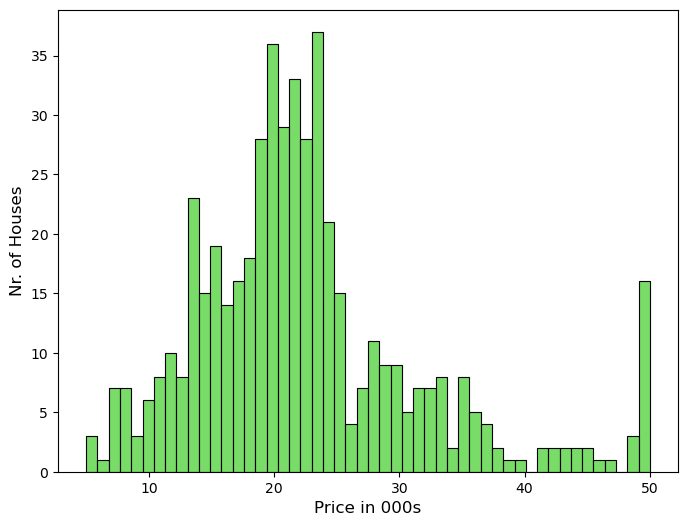

In [80]:
plt.figure(figsize=(8,6))
plt.xlabel("Price in 000s", fontsize=12)
plt.ylabel("Nr. of Houses", fontsize = 12)
sns.histplot(data['PRICE'], bins=50, kde=False, color= '#4cd137')
plt.show()

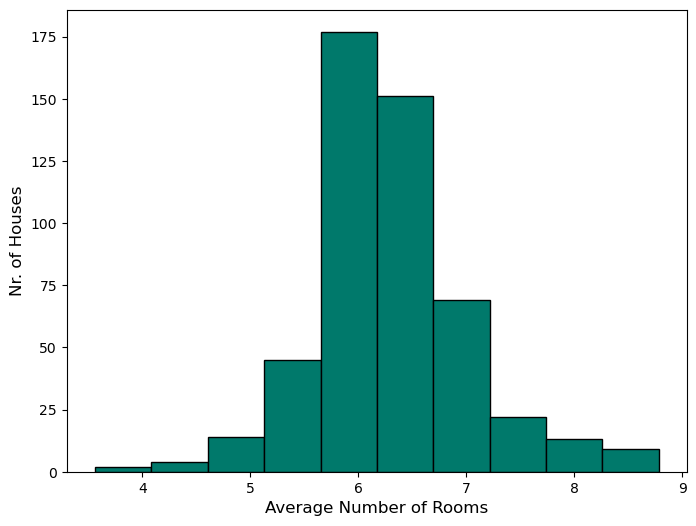

In [89]:
plt.figure(figsize=(8, 6))
plt.xlabel("Average Number of Rooms", fontsize=12)
plt.ylabel("Nr. of Houses", fontsize = 12)
plt.hist(data['RM'], color= '#00796b', edgecolor= 'black')
plt.show()

In [90]:
data['RM'].mean()

6.284634387351779

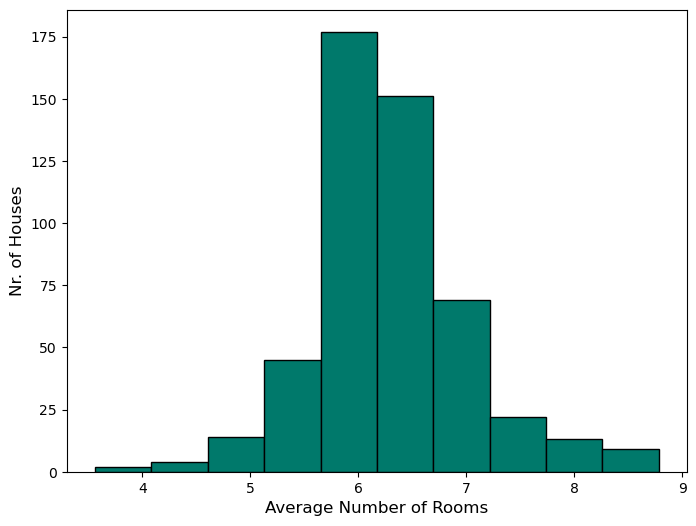

In [89]:
plt.figure(figsize=(8, 6))
plt.xlabel("Average Number of Rooms", fontsize=12)
plt.ylabel("Nr. of Houses", fontsize = 12)
plt.hist(data['RM'], color= '#00796b', edgecolor= 'black')
plt.show()

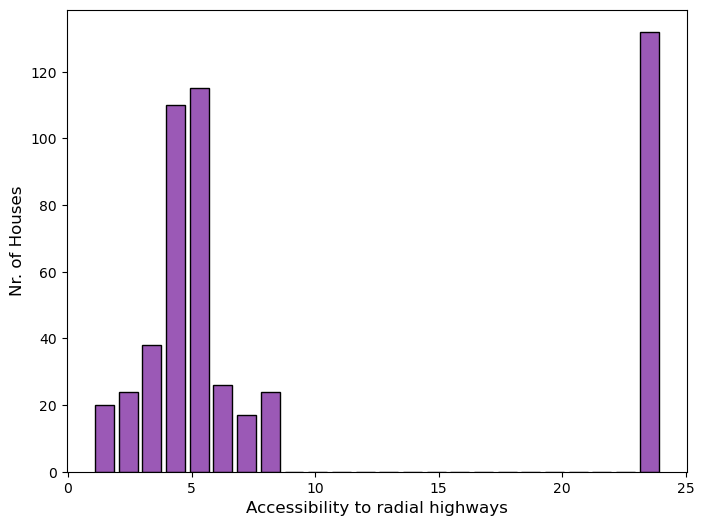

In [96]:
plt.figure(figsize=(8, 6))
plt.xlabel("Accessibility to radial highways", fontsize=12)
plt.ylabel("Nr. of Houses", fontsize = 12)
plt.hist(data['RAD'], color= '#9b59b6', edgecolor= 'black', rwidth=0.8, bins=24)
plt.show()

In [100]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

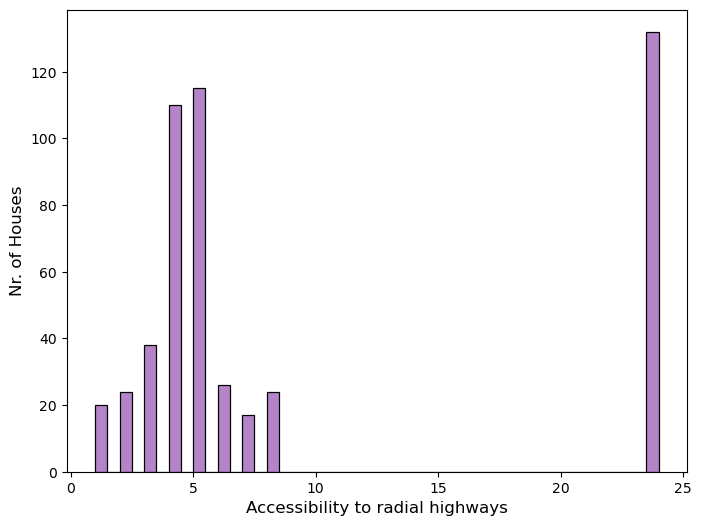

In [107]:
plt.figure(figsize=(8,6))
plt.xlabel("Accessibility to radial highways", fontsize=12)
plt.ylabel("Nr. of Houses", fontsize = 12)
sns.histplot(data['RAD'], bins=24, kde=False, color= '#9b59b6', binwidth=0.5)
plt.show()

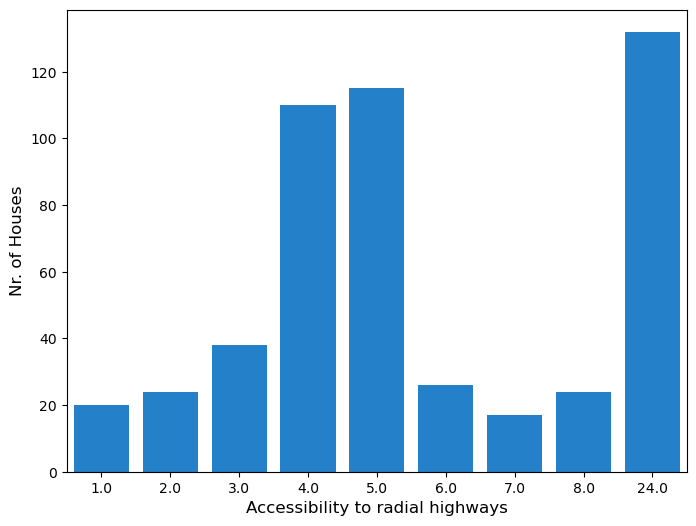

In [117]:
frequency = data['RAD'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=frequency.index, y=frequency, color= '#0984e3')
plt.ylabel("Nr. of Houses", fontsize = 12)
plt.xlabel("Accessibility to radial highways", fontsize=12)
plt.show()

In [118]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [120]:
data['PRICE'].min()

5.0

In [121]:
data['PRICE'].max()

50.0

In [122]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [123]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [124]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [125]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [126]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
## $$\rho_{XY}=corr(X,Y)  $$
## $$ -1.0\leq \rho_{XY} \leq +1.0 $$

In [128]:
data['PRICE'].corr(data['RM'])

0.6953599470715394

In [129]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [130]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [136]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = 1
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

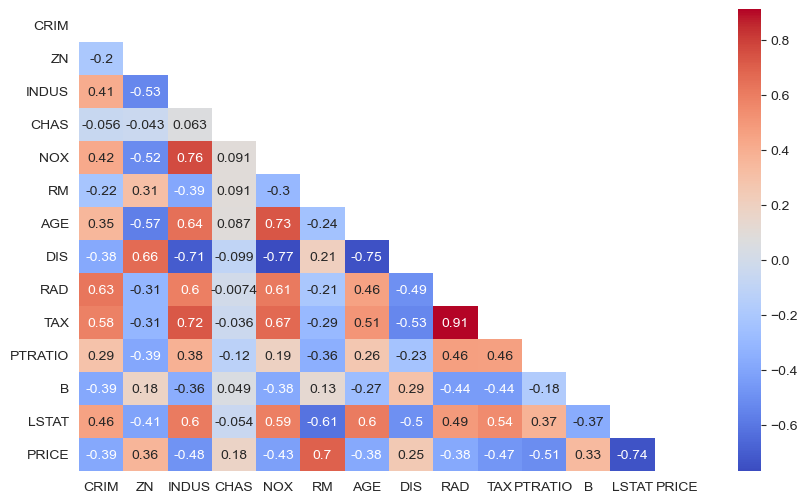

In [155]:
plt.figure(figsize=(10,6))
sns.heatmap(data=data.corr(), mask=mask, annot=True, annot_kws={'size':10}, cmap='coolwarm')
sns.set_style("white")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

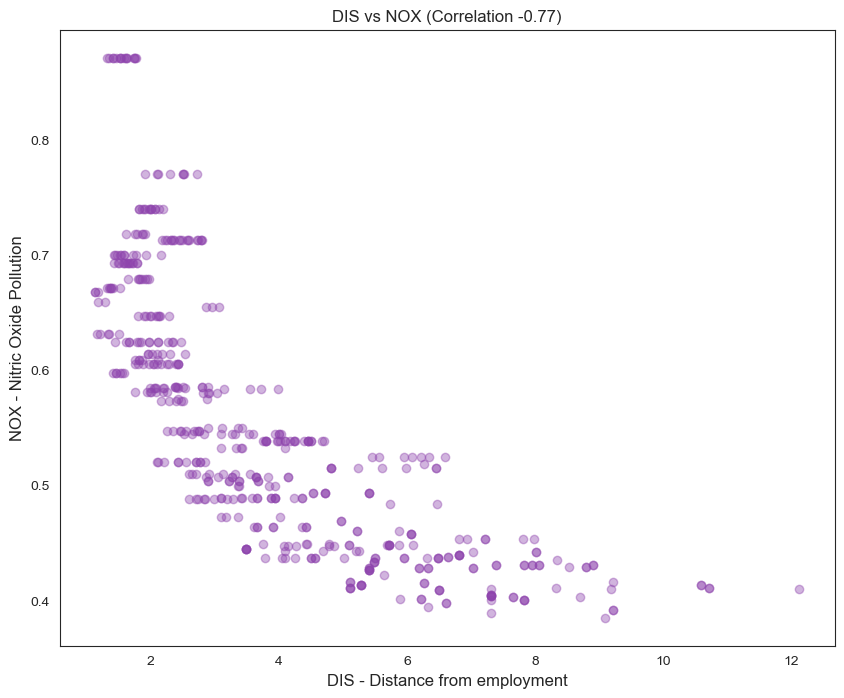

In [164]:
nox_dis_corr = np.round(data['DIS'].corr(data['NOX']), 2)

plt.figure(figsize=(10,8))
plt.scatter(x=data['DIS'], y=data['NOX'], color='#8e44ad', alpha=0.4)
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})')
plt.xlabel('DIS - Distance from employment', fontsize = 12)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize= 12)
plt.show()

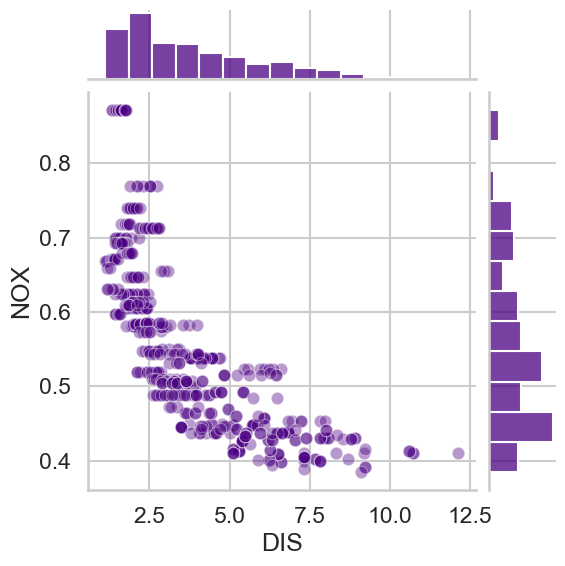

In [174]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='indigo', joint_kws={'alpha':0.4})
plt.show()

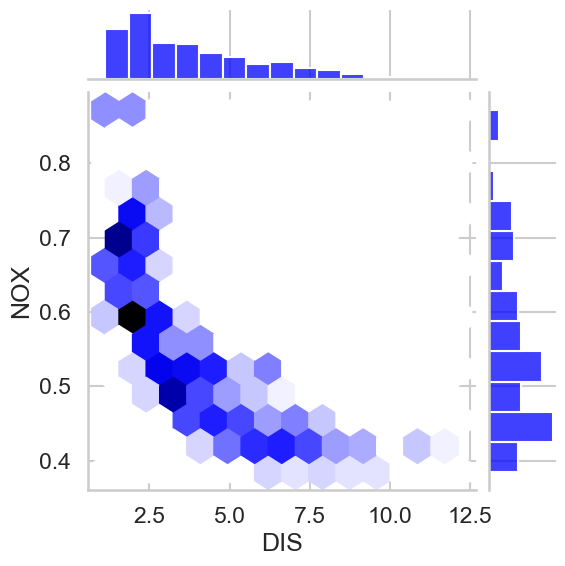

In [178]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='blue', kind='hex')
plt.show()

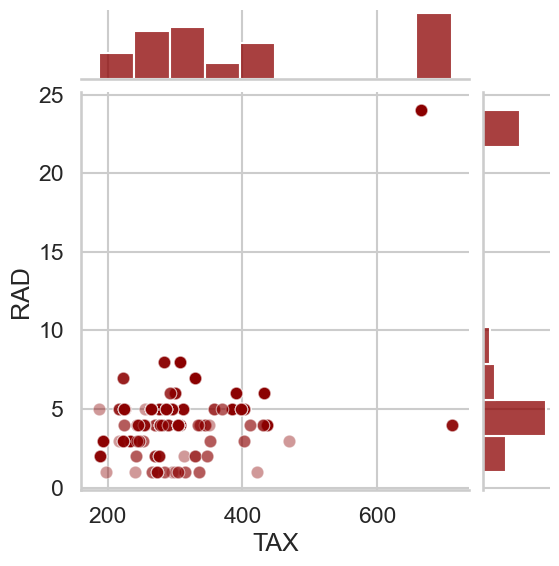

In [180]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], color='darkred', joint_kws={'alpha':0.4})
plt.show()

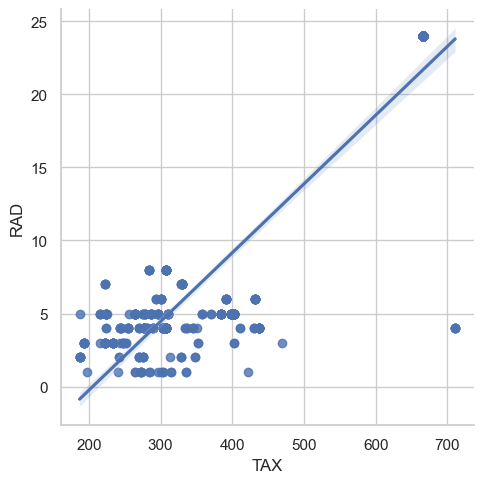

In [186]:
sns.set()
sns.set_style('whitegrid')
sns.lmplot(x='TAX', y='RAD', data=data,)
plt.show()

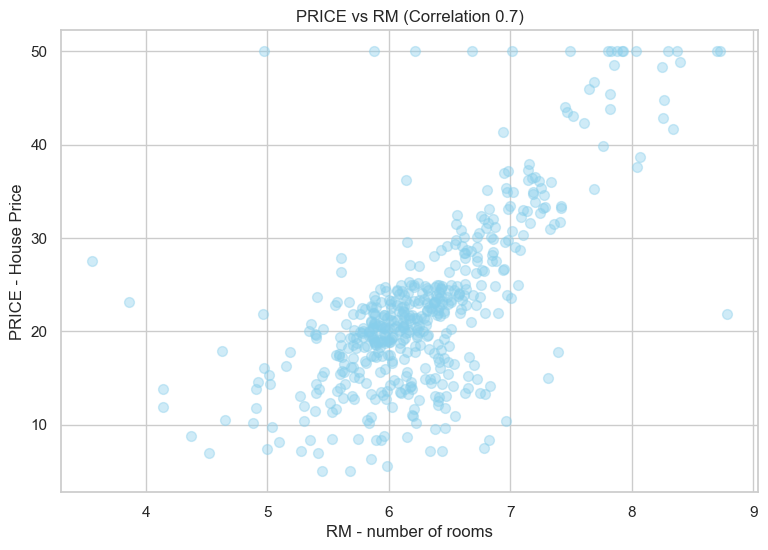

In [192]:
# Challenge: Create a scatter plot between the house prices and the number of rooms (RM)
price_RM_corr = np.round(data['PRICE'].corr(data['RM']), 2)

plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'], y=data['PRICE'], color='skyblue', alpha=0.4, s=50)
plt.title(f'PRICE vs RM (Correlation {price_RM_corr})')
plt.xlabel('RM - number of rooms', fontsize = 12)
plt.ylabel('PRICE - House Price', fontsize= 12)
plt.show()

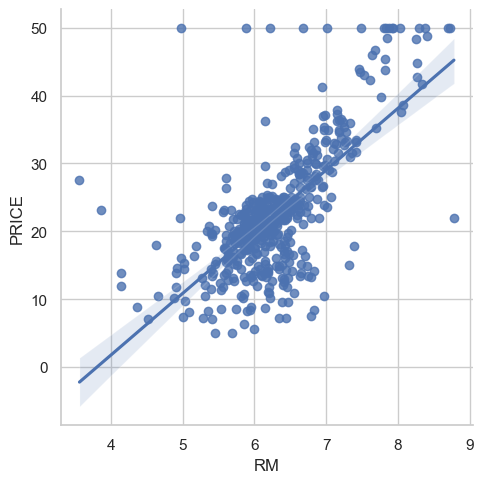

In [193]:
sns.set()
sns.set_style('whitegrid')
sns.lmplot(x='RM', y='PRICE', data=data,)
plt.show()

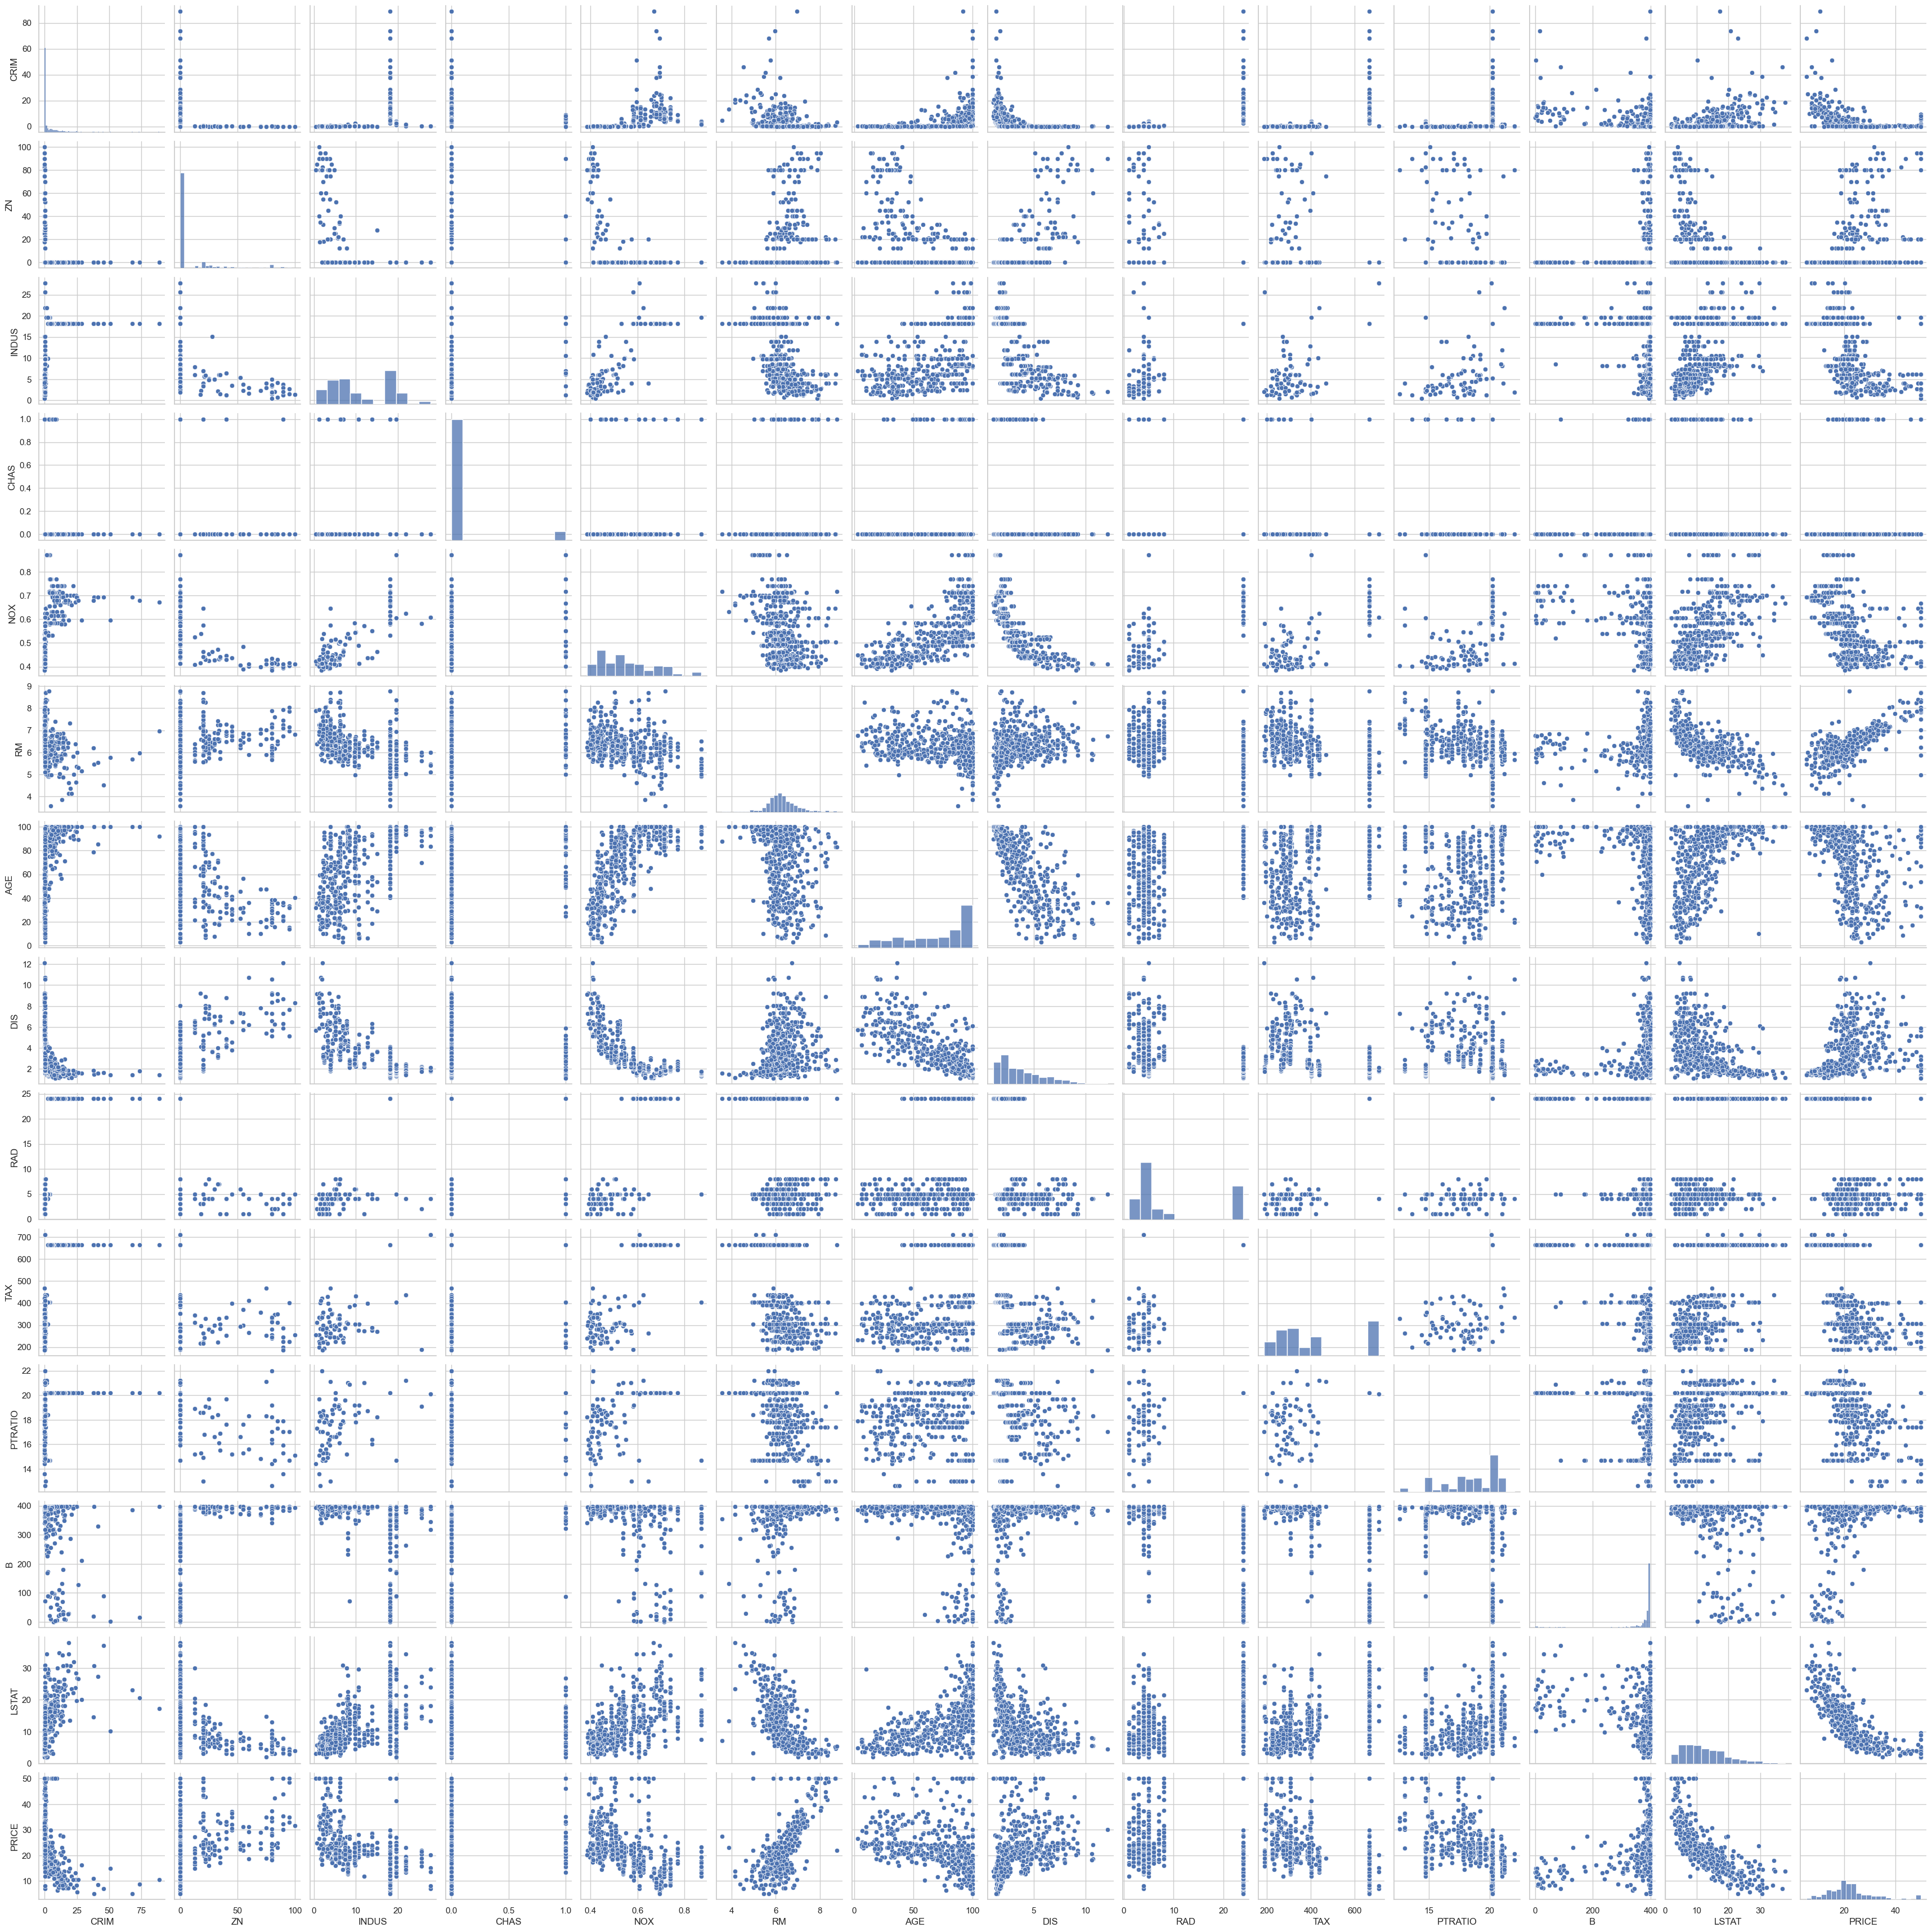

CPU times: total: 1min 5s
Wall time: 1min 5s


In [194]:
%%time

sns.pairplot(data)
plt.show()

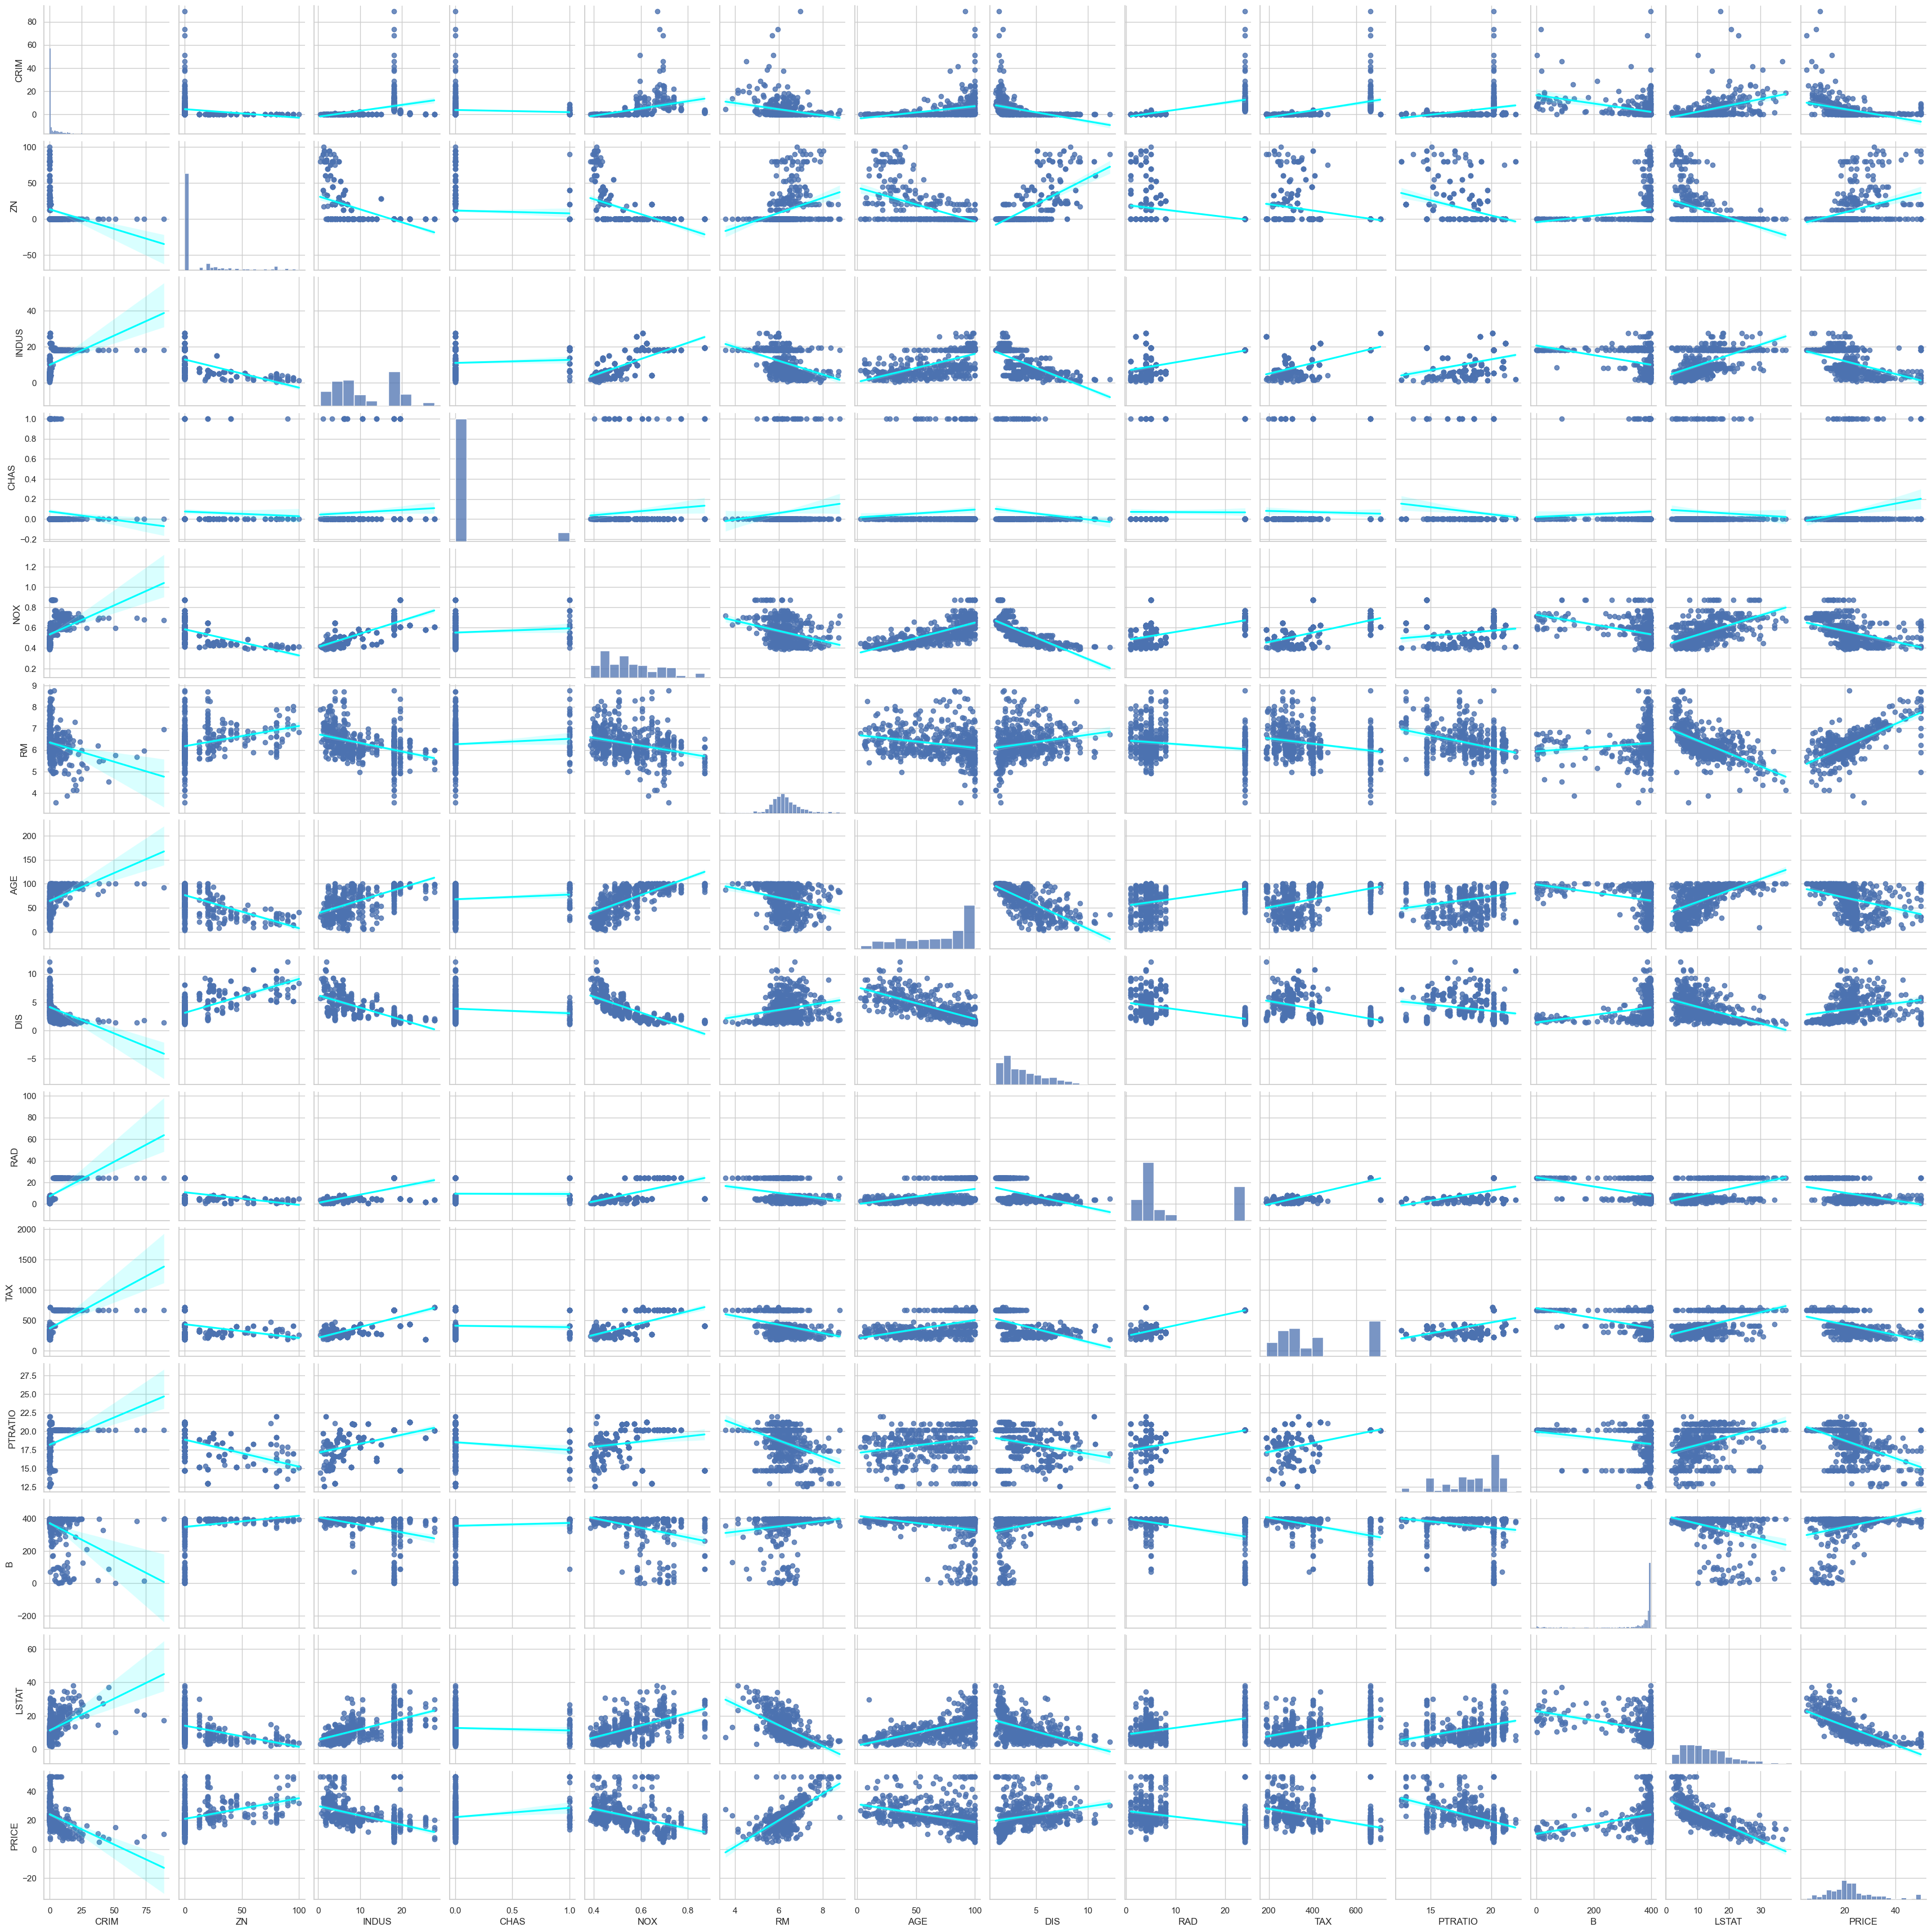

CPU times: total: 3min 39s
Wall time: 1min 52s


In [196]:
%%time

sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Training & Test Dataset Split

In [23]:
price = data['PRICE']
feature = data.drop(labels='PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=10)

In [24]:
# % of training set
len(X_train)/len(price)

0.7984189723320159

In [25]:
# % of test data set
X_test.shape[0]/feature.shape[0]

0.2015810276679842

## Multivariable Regression

In [34]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('Training data r-squared: ', reg.score(X_train, y_train))
print('Test data r-squared: ', reg.score(X_test, y_test))
print('Intercept: ', reg.intercept_)

pd.DataFrame(data=reg.coef_, index=feature_names, columns=['Coef'])

Training data r-squared:  0.750121534530608
Test data r-squared:  0.6709339839115644
Intercept:  36.53305138282461


Coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## Data Transformations

In [35]:
data['PRICE'].skew()

1.1080984082549072

In [37]:
y_log = np.log(data['PRICE'])
y_log.skew()

-0.33032129530987864

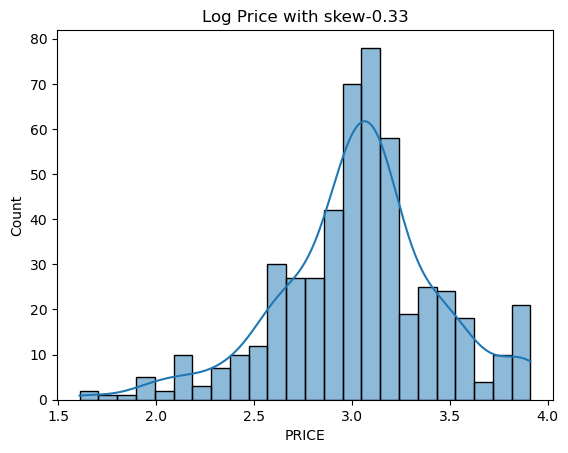

In [42]:
sns.histplot(y_log, kde=True,)
plt.title(f'Log Price with skew{np.round(y_log.skew(), 2)}')
plt.show()

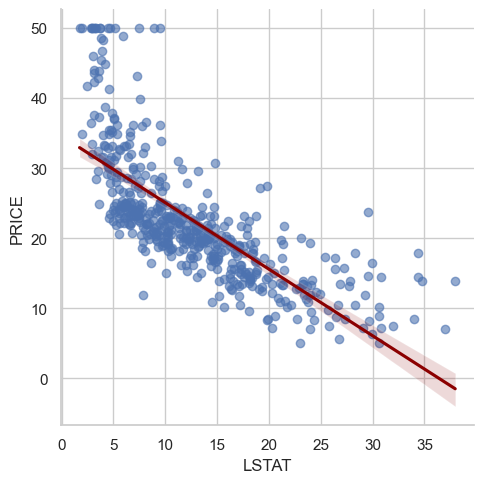

In [52]:
sns.set()
sns.set_style('whitegrid')
sns.lmplot(x='LSTAT', y='PRICE', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

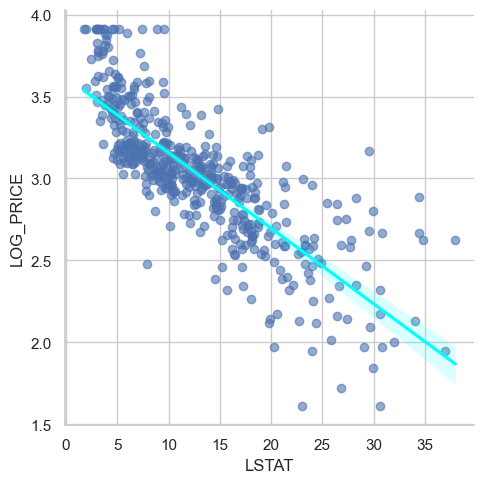

In [55]:
trasnfered_data = feature
trasnfered_data['LOG_PRICE'] = y_log

sns.set()
sns.set_style('whitegrid')
sns.lmplot(x='LSTAT', y='LOG_PRICE', data=trasnfered_data, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using log prices

In [56]:
price = np.log(data['PRICE'])
feature = data.drop(labels='PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=10)

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Training data r-squared: ', reg.score(X_train, y_train))
print('Test data r-squared: ', reg.score(X_test, y_test))
print('Intercept: ', reg.intercept_)

pd.DataFrame(data=reg.coef_, index=feature_names, columns=['Coef'])

Training data r-squared:  0.7930234826697584
Test data r-squared:  0.7446922306260739
Intercept:  4.059943871775208


Coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [57]:
# Charles River Property Premium
np.e**0.080475

1.0838017512597784

## p values & Evaluating Coefficients

In [70]:
X_inc_const = sm.add_constant(X_train)


model = sm.OLS(y_train, X_inc_const)
result = model.fit()

result.params
result.pvalues

pd.DataFrame({'Coef': result.params, 'p_value': round(result.pvalues, 3)})

Coef  p_value
const    4.059944    0.000
CRIM    -0.010672    0.000
ZN       0.001579    0.009
INDUS    0.002030    0.445
CHAS     0.080331    0.038
NOX     -0.704068    0.000
RM       0.073404    0.000
AGE      0.000763    0.209
DIS     -0.047633    0.000
RAD      0.014565    0.000
TAX     -0.000645    0.000
PTRATIO -0.034795    0.000
B        0.000516    0.000
LSTAT   -0.031390    0.000

## Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX +....+ \alpha_{12}LSTAT $$

$$ VIF_{TAX} = \frac{1}{(1-R_{TAX}^2)} $$


In [80]:
variance_inflation_factor(exog=X_inc_const, exog_idx=1)

1.7145250443932485

In [77]:
print('number of columns is X_inc_const is: ',X_inc_const.shape[1])

number of columns is X_inc_const is:  14


In [90]:
for i in range(X_inc_const.shape[1]):
    print(variance_inflation_factor(exog=X_inc_const, exog_idx=i))

597.5487126763895
1.7145250443932485
2.3328224265597597
3.943448822674636
1.0788133385000576
4.410320817897635
1.8404053075678564
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514064
1.3386713255364715
2.812544292793036


In [97]:
vif = [variance_inflation_factor(exog=X_inc_const, exog_idx=i) for i in range(X_inc_const.shape[1])]


pd.DataFrame({'VIF':np.round(vif,2)}, index = X_inc_const.columns)

VIF
const    597.55
CRIM       1.71
ZN         2.33
INDUS      3.94
CHAS       1.08
NOX        4.41
RM         1.84
AGE        3.33
DIS        4.22
RAD        7.31
TAX        8.51
PTRATIO    1.84
B          1.34
LSTAT      2.81

In [100]:
pd.DataFrame({'Coef': result.params, 'p_value': round(result.pvalues, 3) , 'VIF':np.round(vif,2)},)

Coef  p_value     VIF
const    4.059944    0.000  597.55
CRIM    -0.010672    0.000    1.71
ZN       0.001579    0.009    2.33
INDUS    0.002030    0.445    3.94
CHAS     0.080331    0.038    1.08
NOX     -0.704068    0.000    4.41
RM       0.073404    0.000    1.84
AGE      0.000763    0.209    3.33
DIS     -0.047633    0.000    4.22
RAD      0.014565    0.000    7.31
TAX     -0.000645    0.000    8.51
PTRATIO -0.034795    0.000    1.84
B        0.000516    0.000    1.34
LSTAT   -0.031390    0.000    2.81

## Model Simplification & the BIC

In [106]:
# Original model with log prices and all features
X_inc_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_inc_const)
result = model.fit()

orf_coef = pd.DataFrame({'Coef': result.params, 'p_value': round(result.pvalues, 3)})

print('BIC is: ', result.bic)
print('r-squared is: ', result.rsquared)

BIC is:  -139.74997769478875
r-squared is:  0.7930234826697582


In [109]:
# Reduced model #1 excluding INDUS

X_inc_const = sm.add_constant(X_train)
X_inc_const = X_inc_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_inc_const)
result = model.fit()

orf_coef_indus = pd.DataFrame({'Coef': result.params, 'p_value': round(result.pvalues, 3)})

print('BIC is: ', result.bic)
print('r-squared is: ', result.rsquared)


BIC is:  -145.14508855591185
r-squared is:  0.7927126289415163


In [110]:
# Reduced model #2 excluding INDUS and AGE

X_inc_const = sm.add_constant(X_train)
X_inc_const = X_inc_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_inc_const)
result = model.fit()

reduced_coef = pd.DataFrame({'Coef': result.params, 'p_value': round(result.pvalues, 3)})

print('BIC is: ', result.bic)
print('r-squared is: ', result.rsquared)


BIC is:  -149.49934294224656
r-squared is:  0.7918657661852815


In [112]:
frames = [orf_coef, orf_coef_indus, reduced_coef]

pd.concat(frames, axis=1)

Coef  p_value      Coef  p_value      Coef  p_value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## Residuals & Residual Plots

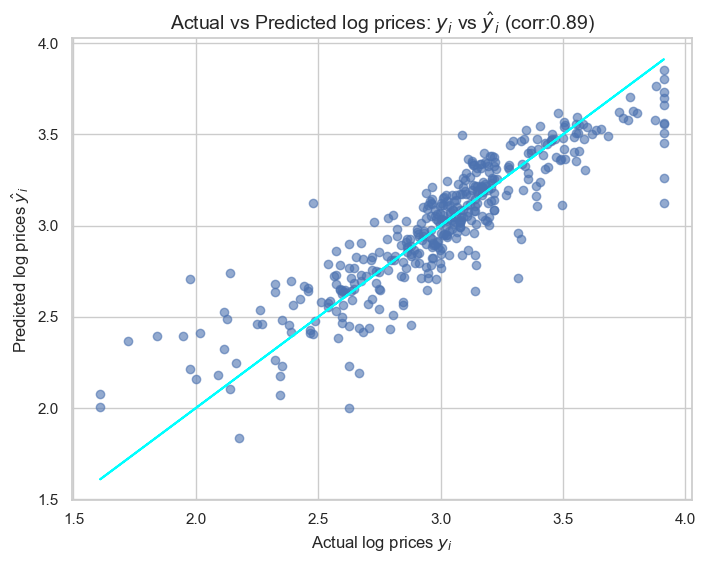

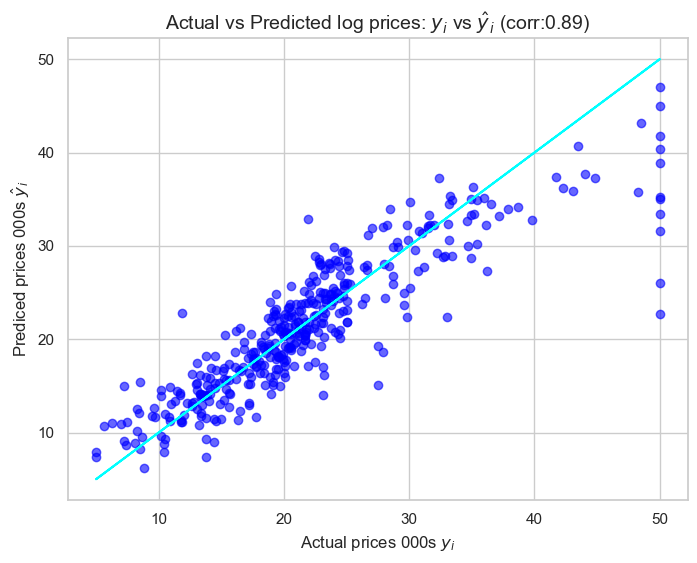

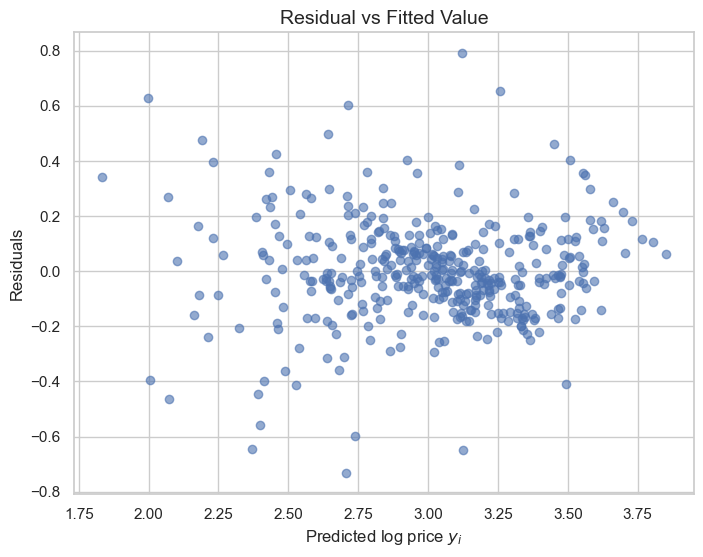

In [157]:
# Modified model: transformed (using log prices) & simplified (dropping two features)

price = np.log(data['PRICE'])
feature = data.drop(labels=['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=10)

# Using Statsmodel
X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_inc_const)
results = model.fit()


# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(8,6))
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (corr:{corr})', fontsize=14)
plt.xlabel('Actual log prices $y_i$')
plt.ylabel('Predicted log prices $\hat y_i$')
plt.scatter(x=y_train, y=results.fittedvalues, alpha= 0.6)
plt.plot(y_train, y_train, color='cyan')
plt.show()


corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(8,6))
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (corr:{corr})', fontsize=14)
plt.xlabel('Actual prices 000s $y_i$')
plt.ylabel('Prediced prices 000s $\hat y_i$')
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, alpha= 0.6, color='blue')
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.show()


plt.figure(figsize=(8,6))
plt.title(f'Residual vs Fitted Value', fontsize=14)
plt.xlabel('Predicted log price $y_i$')
plt.ylabel('Residuals')
plt.scatter(x=results.fittedvalues, y=results.resid, alpha= 0.6,)
plt.show()

# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

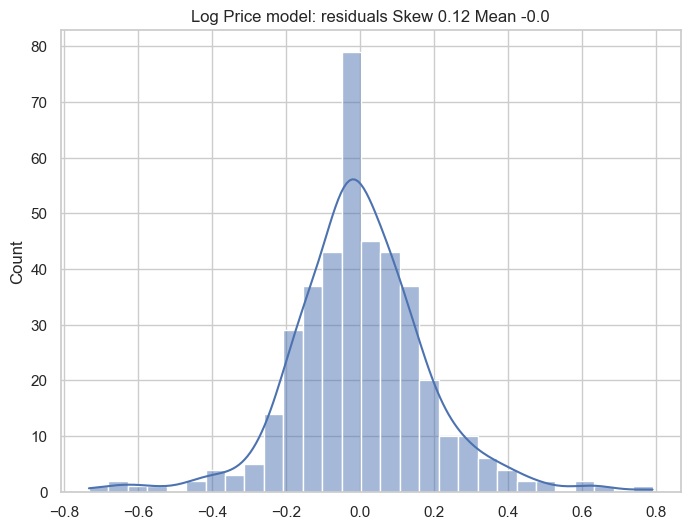

In [158]:
# Distribution of Residuals (log prices) - checking for normality
plt.figure(figsize=(8,6))
resid_skew = np.round(results.resid.skew(), 2)
resid_mean = np.round(results.resid.mean())
sns.histplot(results.resid, kde=True,)
plt.title(f'Log Price model: residuals Skew {resid_skew} Mean {resid_mean}')
plt.show()

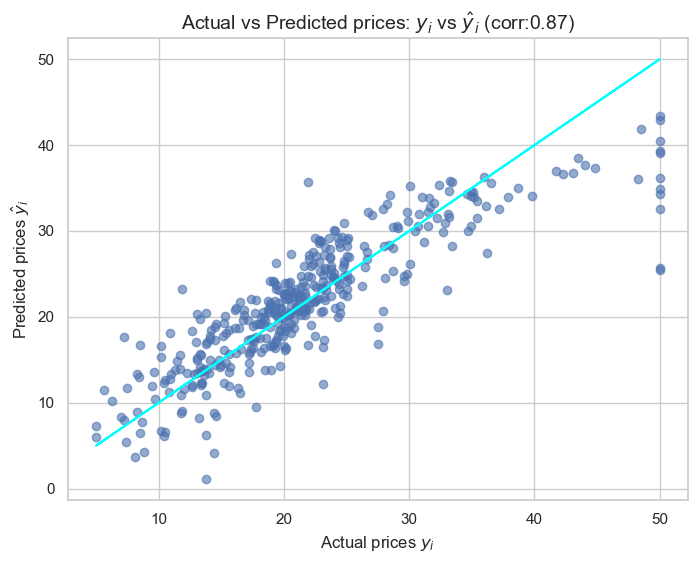

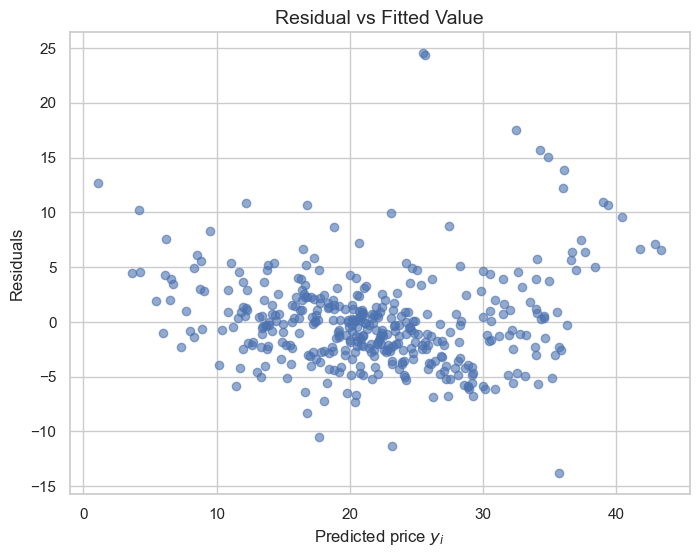

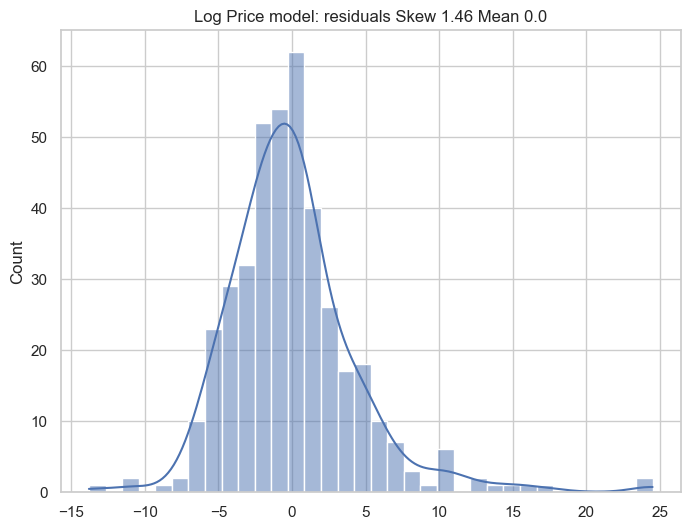

In [159]:
# Original model: normal prices & all features

price = data['PRICE']
feature = data.drop(labels=['PRICE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=10)

# Using Statsmodel
X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_inc_const)
results = model.fit()


# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(8,6))
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (corr:{corr})', fontsize=14)
plt.xlabel('Actual prices $y_i$')
plt.ylabel('Predicted prices $\hat y_i$')
plt.scatter(x=y_train, y=results.fittedvalues, alpha= 0.6)
plt.plot(y_train, y_train, color='cyan')
plt.show()


plt.figure(figsize=(8,6))
plt.title(f'Residual vs Fitted Value', fontsize=14)
plt.xlabel('Predicted price $y_i$')
plt.ylabel('Residuals')
plt.scatter(x=results.fittedvalues, y=results.resid, alpha= 0.6,)
plt.show()


plt.figure(figsize=(8,6))
resid_skew = np.round(results.resid.skew(), 2)
resid_mean = np.round(results.resid.mean())
sns.histplot(results.resid, kde=True,)
plt.title(f'Log Price model: residuals Skew {resid_skew} Mean {resid_mean}')
plt.show()

# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)


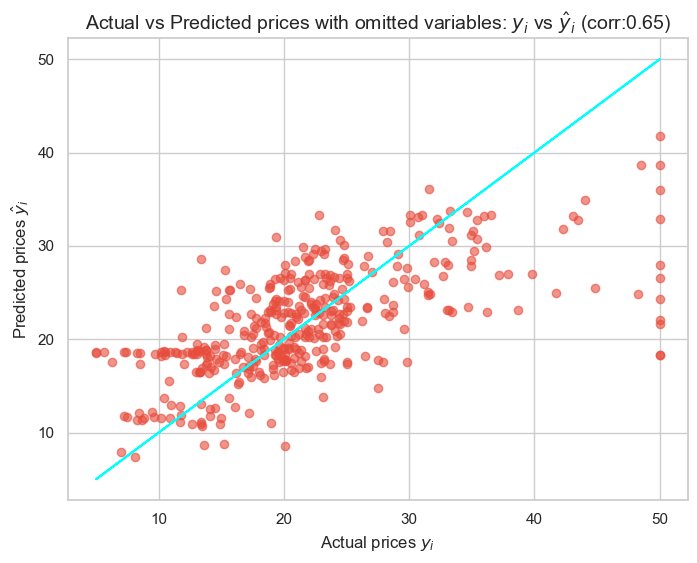

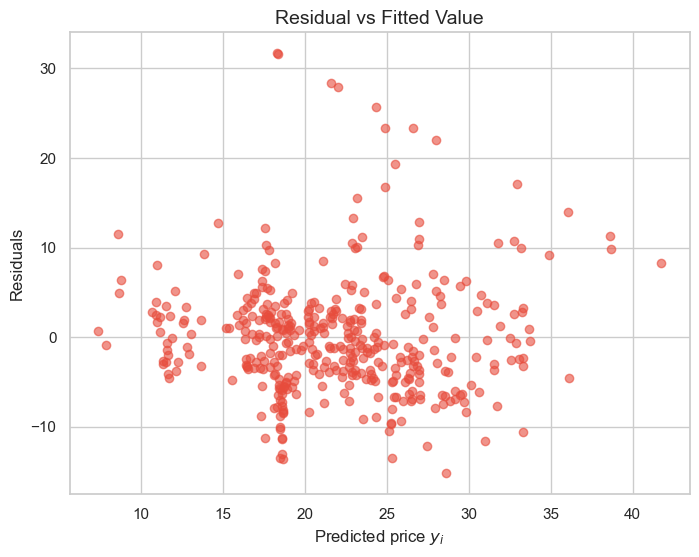

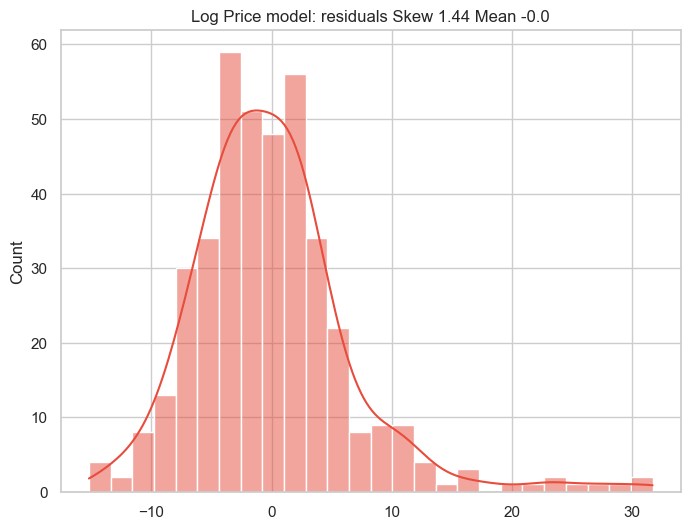

In [160]:
# Model Omitting Key Features using log prices

price = data['PRICE']
feature = data.drop(labels=['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=10)

# Using Statsmodel
X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_inc_const)
results = model.fit()


# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(8,6))
plt.title(f'Actual vs Predicted prices with omitted variables: $y_i$ vs $\hat y_i$ (corr:{corr})', fontsize=14)
plt.xlabel('Actual prices $y_i$')
plt.ylabel('Predicted prices $\hat y_i$')
plt.scatter(x=y_train, y=results.fittedvalues, alpha= 0.6, c='#e74c3c')
plt.plot(y_train, y_train, color='cyan')
plt.show()


plt.figure(figsize=(8,6))
plt.title(f'Residual vs Fitted Value', fontsize=14)
plt.xlabel('Predicted price $y_i$')
plt.ylabel('Residuals')
plt.scatter(x=results.fittedvalues, y=results.resid, alpha= 0.6, c='#e74c3c')
plt.show()


plt.figure(figsize=(8,6))
resid_skew = np.round(results.resid.skew(), 2)
resid_mean = np.round(results.resid.mean())
sns.histplot(results.resid, kde=True, color='#e74c3c')
plt.title(f'Log Price model: residuals Skew {resid_skew} Mean {resid_mean}')
plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [164]:
pd.DataFrame({'MSE':[reduced_log_mse, full_normal_mse, omitted_var_mse],
             'R-Squared':[reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
             'RMSE':np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
            index=['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

MSE  R-Squared      RMSE
Reduced Log Model         0.035      0.792  0.187083
Full Normal Price Model  19.921      0.750  4.463295
Omitted Var Model        44.922      0.428  6.702388

In [179]:



# The lower bound in normal prices is $ 20635.8869068

print('1 s.d. in log prices is: ', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is: ', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is: ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is: ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is:  0.18708286933869708
2 s.d. in log prices is:  0.37416573867739417
The upper bound in log prices for a 95% prediction interval is:  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is:  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155
